### Notes :
Ce notebook à été crée afin de valider l'implémentation des différentes fonctions pour le modèle linéaire

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ctypes import *

In [3]:
path_to_dll = "C:/Users/Maathess/Desktop/IMDB_git/ML/cmake-build-debug/ml_lib.dll"
mylib = cdll.LoadLibrary(path_to_dll)

In [4]:
#INITIALISATION DES ENTREES/SORTIES
mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)


mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None

# Utilisation du Modèle linéaire pour la classification

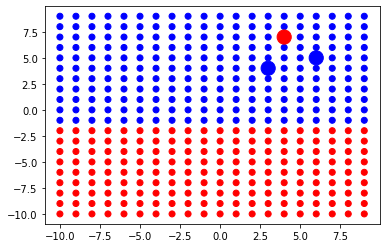

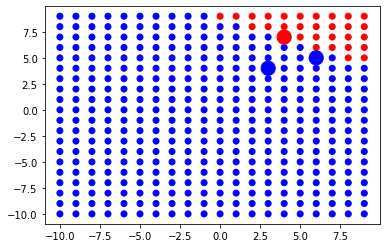

In [45]:
def display_flattened_dataset_inputs_classifcation(): #plot display function
    predicted_outputs = []
    for p in test_dataset:
        arr_res1 = c_float * len(p)
        arr_res2 = arr_res1(*p)

        mylib.predict_linear_model_classification.argtypes = [POINTER(c_float), arr_res1]
        mylib.predict_linear_model_classification.restype = c_float
        curr = mylib.predict_linear_model_classification(model, arr_res2)
        predicted_outputs.append(curr)

    predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
    plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
    plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
    plt.show()
    

dataset_inputs = [
                [3, 4],
                [6, 5],
                [4, 7],
]

dataset_expected_outputs = [
                1,
                1,
                -1,
]

model = mylib.create_linear_model(2)

test_dataset = [[x1, x2] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

display_flattened_dataset_inputs_classifcation() #displaying


'''
WITH TRAINING
'''
flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])
    
#inputs
flattened_df_inputs = c_float * len(flattened_dataset_inputs)
arr_inputs = flattened_df_inputs(*flattened_dataset_inputs)

#outputs
flattened_df_outputs = c_float * len(dataset_expected_outputs)
arr_outputs = flattened_df_outputs(*dataset_expected_outputs)

mylib.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), flattened_df_inputs, flattened_df_outputs, c_float, c_int, c_int]
mylib.train_classification_rosenblatt_rule_linear_model.restype = None
mylib.train_classification_rosenblatt_rule_linear_model(model, arr_inputs, arr_outputs, 0.001, 10000,len(flattened_dataset_inputs))


display_flattened_dataset_inputs_classifcation() #displaying

mylib.destroy_linear_model(model)

# Utilisation du Modèle linéaire pour la régression

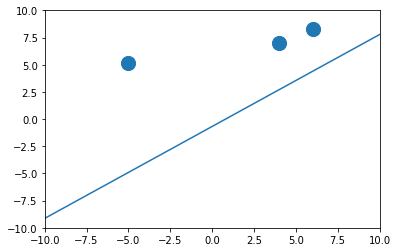

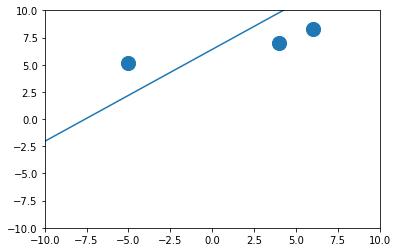

In [51]:
def display_flattened_dataset_inputs_regression(test_dataset_inputs,predicted_outputs,dataset_expected_outputs):
    plt.plot(test_dataset_inputs, predicted_outputs)
    plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
    plt.axis([-10, 10, -10, 10])
    plt.show()
    
    
dataset_inputs = [
                [-5],
                [4],
                [6],
]

dataset_expected_outputs = [
                5.2,
                7,
                8.3
]


model = mylib.create_linear_model(1)

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])

#test_dataset_inputs = [i for i in range(-10, 11)]
test_dataset_inputs = []
for i in range(-10, 11):
    test_dataset_inputs.append(float(i))
    
predicted_outputs = []
for p in test_dataset_inputs:
    predicted_outputs_type = c_float * len([p])
    arr = predicted_outputs_type(*[p])
    
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), predicted_outputs_type]
    mylib.predict_linear_model_regression.restype = c_float

    tmp = mylib.predict_linear_model_regression(model, arr)
    predicted_outputs.append(tmp)
    
display_flattened_dataset_inputs_regression(test_dataset_inputs,predicted_outputs,dataset_expected_outputs)


'''
WITH TRAINING
'''

flattened_dataset_inputs_type = c_float * len(flattened_dataset_inputs)
arr_flattened_dataset_inputs = flattened_dataset_inputs_type(*flattened_dataset_inputs)

dataset_expected_outputs_type = c_float * len(dataset_expected_outputs)
arr_dataset_expected_outputs = dataset_expected_outputs_type(*dataset_expected_outputs)

mylib.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), flattened_dataset_inputs_type, dataset_expected_outputs_type, c_int,c_int]
mylib.train_regression_pseudo_inverse_linear_model.restypes = None
mylib.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset_expected_outputs,len(flattened_dataset_inputs), len(dataset_expected_outputs))

test_dataset_inputs = []
for i in range(-10, 11):
    test_dataset_inputs.append(float(i))
    
predicted_outputs = []
for p in test_dataset_inputs:
    predicted_outputs_type = c_float * len([p])
    arr_predicted_outputs = predicted_outputs_type(*[p])
    
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), predicted_outputs_type]
    mylib.predict_linear_model_regression.restype = c_float

    d = mylib.predict_linear_model_regression(model, arr_predicted_outputs)
    predicted_outputs.append(d)
    
display_flattened_dataset_inputs_regression(test_dataset_inputs,predicted_outputs,dataset_expected_outputs)

mylib.destroy_linear_model(model)
